In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
application_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=["EIN","NAME"],inplace=True)

In [4]:
# Determine the number of unique values in each column.
all_col = application_df.nunique()
more_than_ten = all_col[all_col.values > 10].index
more_than_ten

Index(['APPLICATION_TYPE', 'CLASSIFICATION', 'ASK_AMT'], dtype='object')

In [5]:
# optimization 1: changing the binning for both 'APPLICATION_TYPE'
# and 'CLASSIFICATION' to 200

In [6]:
def bin_col(df,col_name,limit):
    count = df[col_name].value_counts()
    replace = list(count[count < limit].index)
    for app in replace:
        df[col_name] = df[col_name].replace(app,"Other")
    return df

In [7]:
application_df = bin_col(application_df,'APPLICATION_TYPE',200)
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [8]:
application_df = bin_col(application_df,'CLASSIFICATION',200)
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1197
C7000      777
C1700      287
Name: CLASSIFICATION, dtype: int64

In [9]:
application_df['ASK_AMT'].value_counts()

5000        25398
10478           3
15583           3
63981           3
6725            3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: ASK_AMT, Length: 8747, dtype: int64

In [10]:
# Optimization 2: change ASK_AMT to LOG(ASK_AMT)

In [12]:
import numpy as np
application_df["LOG_ASK_AMT"] = np.log10(application_df['ASK_AMT'])

In [13]:
application_df.drop(columns=["ASK_AMT"],inplace=True)

In [14]:
application_df['STATUS'].value_counts()

1    34294
0        5
Name: STATUS, dtype: int64

In [15]:
# optimization 3: change drop STATUS since there are only 5 values that are not 1

In [16]:
application_df.drop(columns=["STATUS"],inplace=True)

In [17]:
application_df.columns

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS', 'IS_SUCCESSFUL',
       'LOG_ASK_AMT'],
      dtype='object')

In [18]:
# Generate our categorical variable lists
cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
# Create a OneHotEncoder instanc
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(cat)
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(cat,1)

C:\Users\afrap\anaconda3\envs\mlenv\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\afrap\AppData\Local\Temp\ipykernel_9044\3169484359.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  application_df = application_df.drop(cat,1)


In [19]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(columns=["IS_SUCCESSFUL"]).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)

In [20]:
# Create a StandardScaler instances
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [21]:
# optimization 4: increasing number of hidden layers
# optimization 5: increase the number of neurons in each later
# optimization 6: increase epoth to 500
# optimization 7: use sigmoid activation function

In [22]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 160
hidden_nodes_layer2 = 160
hidden_nodes_layer3 = 160
hidden_nodes_layer4 = 160

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))
# Third hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))
# forth hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="sigmoid"))


# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints_OPT/",exist_ok=True)
checkpoint_path = "checkpoints_OPT/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch', period=5)

# Train the model
fit_model_new = nn_new.fit(X_train_scaled,y_train,epochs=500,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/500
804/804 [==============================] - 2s 1ms/step - loss: 0.5816 - accuracy: 0.7112
Epoch 2/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5605 - accuracy: 0.7253
Epoch 3/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5571 - accuracy: 0.7247
Epoch 4/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5539 - accuracy: 0.7269
Epoch 5/500
782/804 [============================>.] - ETA: 0s - loss: 0.5536 - accuracy: 0.7271
Epoch 5: saving model to checkpoints_OPT\weights.05.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5524 - accuracy: 0.7285
Epoch 6/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5513 - accuracy: 0.7301
Epoch 7/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5501 - accuracy: 0.7303
Epoch 8/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5500 - accuracy: 0.7288
Epoch 9/500
804/804 [=============================

804/804 [==============================] - 1s 1ms/step - loss: 0.5293 - accuracy: 0.7389
Epoch 64/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5290 - accuracy: 0.7398
Epoch 65/500
769/804 [===========================>..] - ETA: 0s - loss: 0.5281 - accuracy: 0.7393
Epoch 65: saving model to checkpoints_OPT\weights.65.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5284 - accuracy: 0.7390
Epoch 66/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5284 - accuracy: 0.7400
Epoch 67/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5288 - accuracy: 0.7404
Epoch 68/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5279 - accuracy: 0.7401
Epoch 69/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5277 - accuracy: 0.7414
Epoch 70/500
767/804 [===========================>..] - ETA: 0s - loss: 0.5276 - accuracy: 0.7393
Epoch 70: saving model to checkpoints_OPT\weights.70.hdf5


804/804 [==============================] - 1s 1ms/step - loss: 0.5180 - accuracy: 0.7458
Epoch 126/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5182 - accuracy: 0.7462
Epoch 127/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5187 - accuracy: 0.7456
Epoch 128/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5184 - accuracy: 0.7454
Epoch 129/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5177 - accuracy: 0.7458
Epoch 130/500
763/804 [===========================>..] - ETA: 0s - loss: 0.5183 - accuracy: 0.7465
Epoch 130: saving model to checkpoints_OPT\weights.130.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5179 - accuracy: 0.7467
Epoch 131/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5179 - accuracy: 0.7460
Epoch 132/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5177 - accuracy: 0.7461
Epoch 133/500
804/804 [======================

804/804 [==============================] - 1s 1ms/step - loss: 0.5126 - accuracy: 0.7472
Epoch 188/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5127 - accuracy: 0.7483
Epoch 189/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5126 - accuracy: 0.7484
Epoch 190/500
803/804 [============================>.] - ETA: 0s - loss: 0.5132 - accuracy: 0.7482
Epoch 190: saving model to checkpoints_OPT\weights.190.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5132 - accuracy: 0.7481
Epoch 191/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5114 - accuracy: 0.7476
Epoch 192/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5119 - accuracy: 0.7481
Epoch 193/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5111 - accuracy: 0.7486
Epoch 194/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5117 - accuracy: 0.7485
Epoch 195/500
801/804 [======================

804/804 [==============================] - 1s 1ms/step - loss: 0.5101 - accuracy: 0.7503
Epoch 250/500
779/804 [============================>.] - ETA: 0s - loss: 0.5100 - accuracy: 0.7505
Epoch 250: saving model to checkpoints_OPT\weights.250.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5099 - accuracy: 0.7506
Epoch 251/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5090 - accuracy: 0.7493
Epoch 252/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5085 - accuracy: 0.7509
Epoch 253/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5086 - accuracy: 0.7491
Epoch 254/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5083 - accuracy: 0.7505
Epoch 255/500
803/804 [============================>.] - ETA: 0s - loss: 0.5090 - accuracy: 0.7496
Epoch 255: saving model to checkpoints_OPT\weights.255.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5092 - accuracy: 0.7494
Epo

Epoch 311/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5075 - accuracy: 0.7514
Epoch 312/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5072 - accuracy: 0.7515
Epoch 313/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5067 - accuracy: 0.7514
Epoch 314/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5067 - accuracy: 0.7516
Epoch 315/500
795/804 [============================>.] - ETA: 0s - loss: 0.5071 - accuracy: 0.7517
Epoch 315: saving model to checkpoints_OPT\weights.315.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5069 - accuracy: 0.7517
Epoch 316/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5059 - accuracy: 0.7521
Epoch 317/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5064 - accuracy: 0.7510
Epoch 318/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5069 - accuracy: 0.7523
Epoch 319/500
804/804 [========

804/804 [==============================] - 1s 1ms/step - loss: 0.5057 - accuracy: 0.7514
Epoch 374/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5040 - accuracy: 0.7520
Epoch 375/500
768/804 [===========================>..] - ETA: 0s - loss: 0.5048 - accuracy: 0.7527
Epoch 375: saving model to checkpoints_OPT\weights.375.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5042 - accuracy: 0.7534
Epoch 376/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5051 - accuracy: 0.7519
Epoch 377/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5054 - accuracy: 0.7531
Epoch 378/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5046 - accuracy: 0.7532
Epoch 379/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5046 - accuracy: 0.7520
Epoch 380/500
769/804 [===========================>..] - ETA: 0s - loss: 0.5053 - accuracy: 0.7515
Epoch 380: saving model to checkpoints_OPT\weight

797/804 [============================>.] - ETA: 0s - loss: 0.5036 - accuracy: 0.7534
Epoch 435: saving model to checkpoints_OPT\weights.435.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5045 - accuracy: 0.7527
Epoch 436/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5044 - accuracy: 0.7513
Epoch 437/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5047 - accuracy: 0.7524
Epoch 438/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5038 - accuracy: 0.7528
Epoch 439/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5037 - accuracy: 0.7524
Epoch 440/500
768/804 [===========================>..] - ETA: 0s - loss: 0.5041 - accuracy: 0.7521
Epoch 440: saving model to checkpoints_OPT\weights.440.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5037 - accuracy: 0.7528
Epoch 441/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5034 - accuracy: 0.7518
Epo

804/804 [==============================] - 1s 1ms/step - loss: 0.5023 - accuracy: 0.7536
Epoch 497/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5032 - accuracy: 0.7537
Epoch 498/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5036 - accuracy: 0.7530
Epoch 499/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5029 - accuracy: 0.7537
Epoch 500/500
763/804 [===========================>..] - ETA: 0s - loss: 0.5004 - accuracy: 0.7555
Epoch 500: saving model to checkpoints_OPT\weights.500.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5017 - accuracy: 0.7542
268/268 - 0s - loss: 0.6434 - accuracy: 0.7311 - 302ms/epoch - 1ms/step
Loss: 0.6433914303779602, Accuracy: 0.7310787439346313


In [23]:
nn_new.save("AlphabetSoupCharity_Optimization.h5")

Text(0, 0.5, 'accuracy')

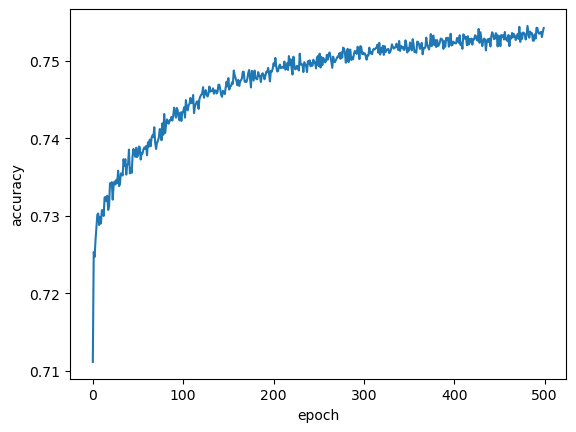

In [24]:
import matplotlib.pyplot as plt
plt.plot(fit_model_new.history['accuracy'])
plt.xlabel("epoch")
plt.ylabel("accuracy")

Text(0, 0.5, 'loss')

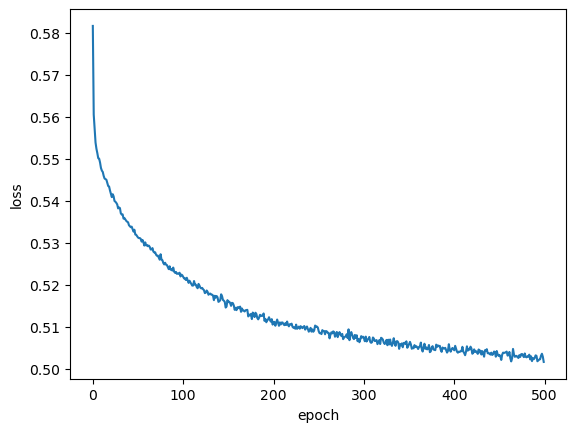

In [25]:
plt.plot(fit_model_new.history['loss'])
plt.xlabel("epoch")
plt.ylabel("loss")